# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import textwrap

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
temp_units = "metric"
url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city    
    city_url = url  + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]   
        city_lng = city_weather["coord"]["lon"]   
        city_max_temp = city_weather["main"]["temp_max"]   
        city_humidity = city_weather["main"]["humidity"]   
        city_clouds = city_weather["clouds"]["all"]        
        city_wind = city_weather["wind"]["speed"]          
        city_country = city_weather["sys"]["country"]      
        city_date = city_weather["dt"]  
        
        # Append the City information into city_data list
        city_data.append (
                            {
                                "City": city, 
                                "Lat": city_lat, 
                                "Lng": city_lng, 
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date
                           }
                        )
        
 # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | cabedelo
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | birjand
Processing Record 11 of Set 1 | great bend
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | henties bay
Processing Record 16 of Set 1 | vozhega
Processing Record 17 of Set 1 | hellin
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | vila velha
Processing Record 22 of Set 1 | kapaa
Processing Rec

Processing Record 39 of Set 4 | san giovanni in fiore
Processing Record 40 of Set 4 | kirgiz-miyaki
Processing Record 41 of Set 4 | broken hill
Processing Record 42 of Set 4 | bitung
Processing Record 43 of Set 4 | utiroa
City not found. Skipping...
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | sogne
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | cayeli
Processing Record 49 of Set 4 | yenagoa
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | kayanga
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | kuala perlis
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | los llanos de aridane
Processing Record 6 of Set 5 | sydney
Processing Record 7 of Set 5 | wanaka
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | turayf
Processing Record 11 of Set 5 | belmonte
Processing Reco

Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | san patricio
Processing Record 32 of Set 8 | idaho falls
Processing Record 33 of Set 8 | aklavik
Processing Record 34 of Set 8 | nadvoitsy
Processing Record 35 of Set 8 | kamaishi
Processing Record 36 of Set 8 | pesochnoye
Processing Record 37 of Set 8 | isoka
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | nayudupeta
Processing Record 40 of Set 8 | sand springs
Processing Record 41 of Set 8 | lira
Processing Record 42 of Set 8 | kanniyakumari
Processing Record 43 of Set 8 | mahonda
Processing Record 44 of Set 8 | puri
Processing Record 45 of Set 8 | honningsvag
Processing Record 46 of Set 8 | beira
Processing Record 47 of Set 8 | georgiyevka
Processing Record 48 of Set 8 | ahuimanu
Processing Record 49 of Set 8 | aparecida
Processing Record 0 of Set 9 | utete
Processing Record 1 of Set 9 | camrose
Processing Record 2 of Set 9 | grand centre
City not found. Skipping...
Processing Reco

Processing Record 15 of Set 12 | zipacon
Processing Record 16 of Set 12 | siniscola
Processing Record 17 of Set 12 | bandarbeyla
Processing Record 18 of Set 12 | berasia
Processing Record 19 of Set 12 | khash
Processing Record 20 of Set 12 | kuala sungai baru
Processing Record 21 of Set 12 | sargatskoye
Processing Record 22 of Set 12 | visaginas
Processing Record 23 of Set 12 | sarangani
Processing Record 24 of Set 12 | chililabombwe
Processing Record 25 of Set 12 | namatanai
Processing Record 26 of Set 12 | akom
Processing Record 27 of Set 12 | bagra
Processing Record 28 of Set 12 | hendijan
City not found. Skipping...
Processing Record 29 of Set 12 | caloundra
Processing Record 30 of Set 12 | mehamn
Processing Record 31 of Set 12 | oriximina
Processing Record 32 of Set 12 | kruisfontein
Processing Record 33 of Set 12 | ondjiva
Processing Record 34 of Set 12 | ambon
Processing Record 35 of Set 12 | pangody
Processing Record 36 of Set 12 | namanyere
Processing Record 37 of Set 12 | bah

In [4]:
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=80913234e69296e45dd43131c22cd2ae&units=metric&q=


In [5]:
city_data

[{'City': 'hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 28.49,
  'Humidity': 68,
  'Cloudiness': 75,
  'Wind Speed': 4.63,
  'Country': 'US',
  'Date': 1678415082},
 {'City': 'cabedelo',
  'Lat': -6.9811,
  'Lng': -34.8339,
  'Max Temp': 26.37,
  'Humidity': 78,
  'Cloudiness': 100,
  'Wind Speed': 5.35,
  'Country': 'BR',
  'Date': 1678415274},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 4.16,
  'Humidity': 65,
  'Cloudiness': 0,
  'Wind Speed': 4.12,
  'Country': 'US',
  'Date': 1678415092},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 8.06,
  'Humidity': 81,
  'Cloudiness': 75,
  'Wind Speed': 4.63,
  'Country': 'CL',
  'Date': 1678414964},
 {'City': 'bathsheba',
  'Lat': 13.2167,
  'Lng': -59.5167,
  'Max Temp': 24.34,
  'Humidity': 88,
  'Cloudiness': 20,
  'Wind Speed': 0.51,
  'Country': 'BB',
  'Date': 1678415113},
 {'City': 'saint-philippe',
  'Lat': -21.3585,
  'Lng': 55.7679,
  'Max Temp': 22.77,
  'Humidit

In [6]:
# Convert the cities weather data into a Pandas DataFrame                                 
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,28.49,68,75,4.63,US,1678415082
1,cabedelo,-6.9811,-34.8339,26.37,78,100,5.35,BR,1678415274
2,bethel,41.3712,-73.4140,4.16,65,0,4.12,US,1678415092
3,punta arenas,-53.1500,-70.9167,8.06,81,75,4.63,CL,1678414964
4,bathsheba,13.2167,-59.5167,24.34,88,20,0.51,BB,1678415113


In [7]:
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,28.49,68,75,4.63,US,1678415082
1,cabedelo,-6.9811,-34.8339,26.37,78,100,5.35,BR,1678415274
2,bethel,41.3712,-73.4140,4.16,65,0,4.12,US,1678415092
3,punta arenas,-53.1500,-70.9167,8.06,81,75,4.63,CL,1678414964
4,bathsheba,13.2167,-59.5167,24.34,88,20,0.51,BB,1678415113


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

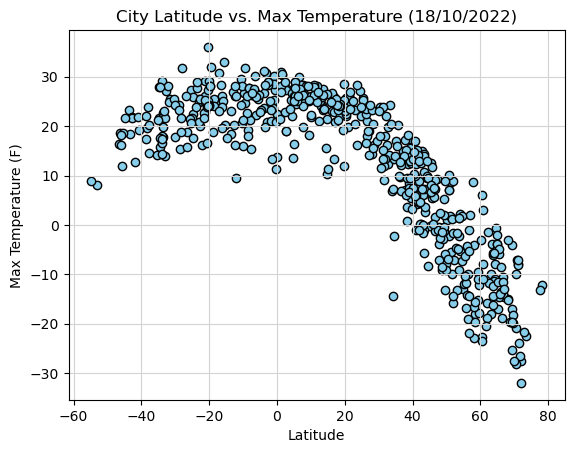

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Max Temperature (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True,  which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_image/Temperature_Vs_Latitude.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

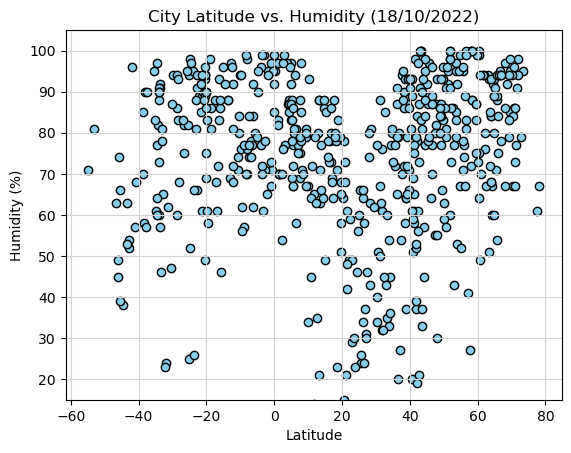

In [11]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")
# Incorporate the other graph properties 
plt.title("City Latitude vs. Humidity (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_image/Humidity_Vs_Latitude.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

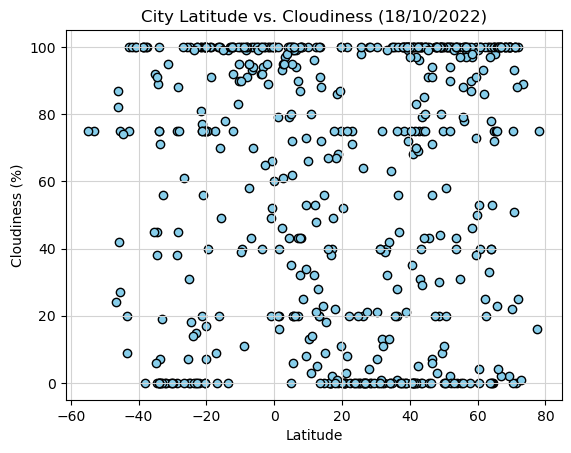

In [12]:
# Build the scatter plots for latitude vs. cloudiness 
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Cloudiness (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True, which="major", axis="both", linestyle="-", color="lightgrey")

# Save the figure
plt.savefig("output_image/Cloudiness_Vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

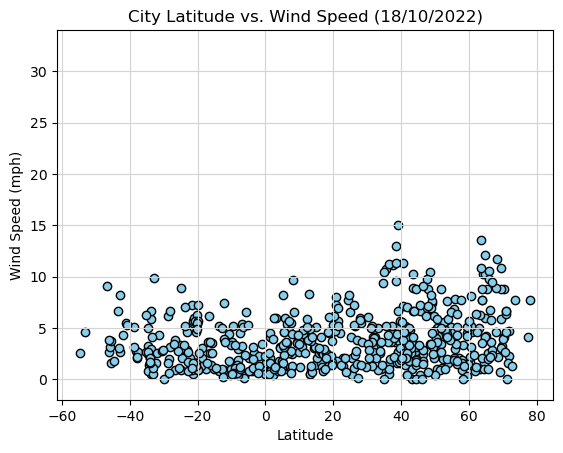

In [13]:
# Build the scatter plots for latitude vs. wind speed 
plt.scatter(city_data_df["Lat"],  city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties 
plt.title("City Latitude vs. Wind Speed (18/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_image/Wind_Speed_Vs_Latitude.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots 
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get equation of line
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    plt.annotate(line_equation, text_coordinates, fontsize=15,color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")


In [15]:
index13 = city_data_df.loc[13]
index13

City          henties bay
Lat               -22.116
Lng               14.2845
Max Temp            16.25
Humidity               89
Cloudiness              0
Wind Speed           2.03
Country               NaN
Date           1678415584
Name: 13, dtype: object

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,28.49,68,75,4.63,US,1678415082
2,bethel,41.3712,-73.4140,4.16,65,0,4.12,US,1678415092
4,bathsheba,13.2167,-59.5167,24.34,88,20,0.51,BB,1678415113
8,saskylakh,71.9167,114.0833,-31.98,98,25,2.27,RU,1678415083
9,birjand,32.8663,59.2211,12.26,43,40,3.09,IR,1678415403


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,28.49,68,75,4.63,US,1678415082
2,bethel,41.3712,-73.4140,4.16,65,0,4.12,US,1678415092
4,bathsheba,13.2167,-59.5167,24.34,88,20,0.51,BB,1678415113
8,saskylakh,71.9167,114.0833,-31.98,98,25,2.27,RU,1678415083
9,birjand,32.8663,59.2211,12.26,43,40,3.09,IR,1678415403


In [18]:
len(northern_hem_df)

408

In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cabedelo,-6.9811,-34.8339,26.37,78,100,5.35,BR,1678415274
3,punta arenas,-53.1500,-70.9167,8.06,81,75,4.63,CL,1678414964
5,saint-philippe,-21.3585,55.7679,22.77,89,77,5.50,RE,1678415075
6,vaini,-21.2000,-175.2000,29.09,61,20,5.66,TO,1678415068
7,busselton,-33.6500,115.3333,22.71,57,7,2.33,AU,1678415068


In [20]:
len(southern_hem_df)

171

###  Temperature vs. Latitude Linear Regression Plot

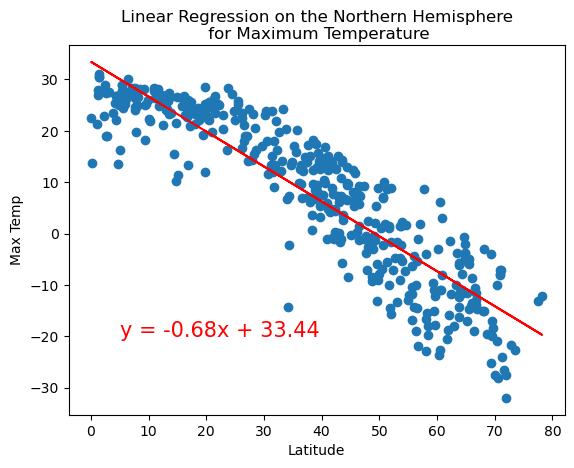

The p-value is: 0.000
The r-value is: -0.903


In [21]:
# Linear regression on Northern Hemisphere 
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))

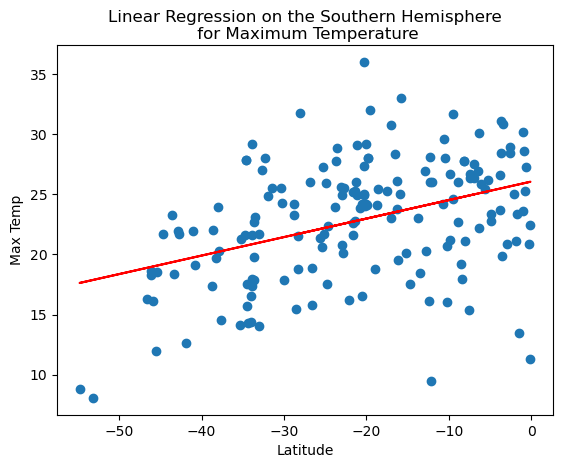

The p-value is: 0.000
The r-value is: 0.405


In [22]:
# Linear regression on Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

**Discussion about the linear relationship:
          - The linear regression for temperature Vs Latitude can be best fit for the data given both in northern and southern hemispher

### Humidity vs. Latitude Linear Regression Plot

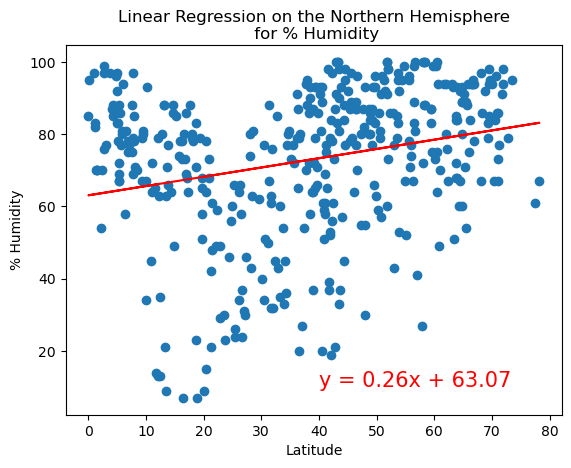

The p-value is: 0.000
The r-value is: 0.251


In [23]:
# Northern Hemisphere  
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

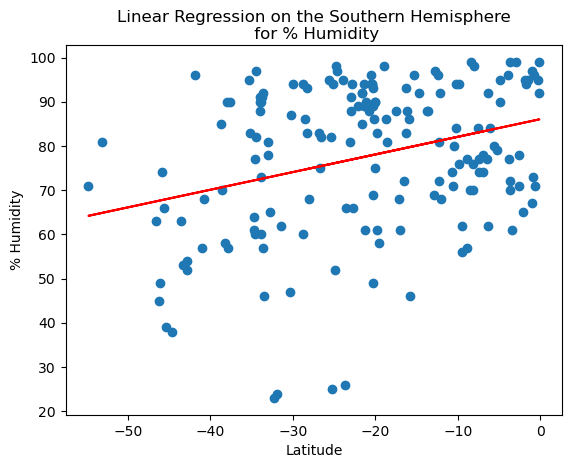

The p-value is: 0.000
The r-value is: 0.311


In [24]:
# Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

**Discussion about the linear relationship: - Another kind of regression has to be produced as linear regression is not best for 
the humidity Vs Latitude data in both hemisphers

### Cloudiness vs. Latitude Linear Regression Plot

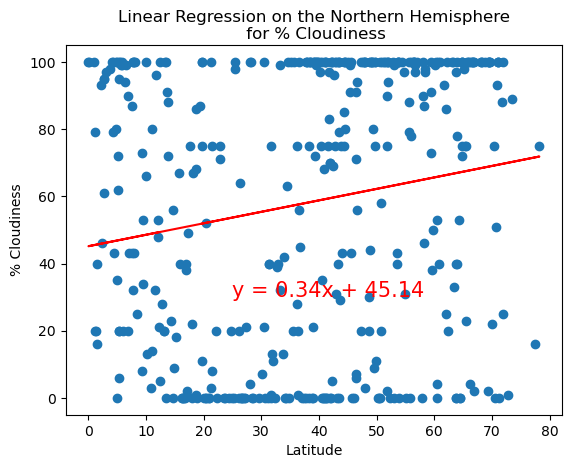

The p-value is: 0.000
The r-value is: 0.172


In [25]:
# Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

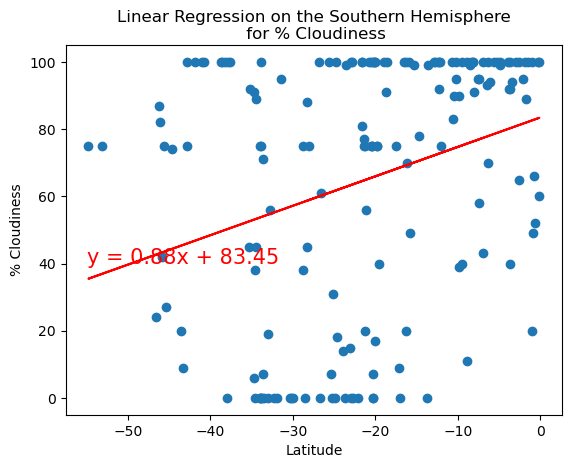

The p-value is: 0.000
The r-value is: 0.302


In [26]:
# Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

**Discussion about the linear relationship: - Linear regression is not best fit hence another regression needs to be produced for cloudness Vs Latitude in both hemisphers

### Wind Speed vs. Latitude Linear Regression Plot

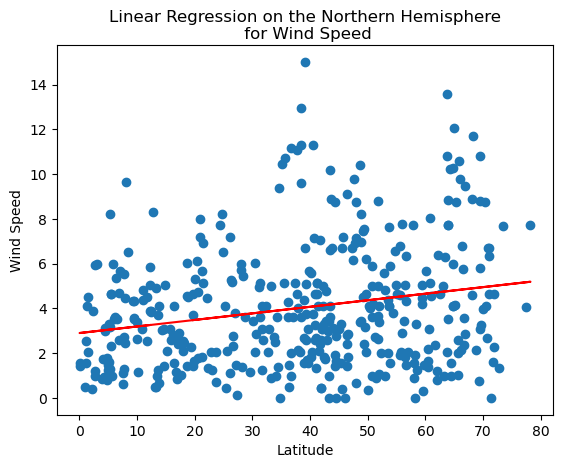

The p-value is: 0.000
The r-value is: 0.220


In [27]:
# Northern Hemisphere 
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

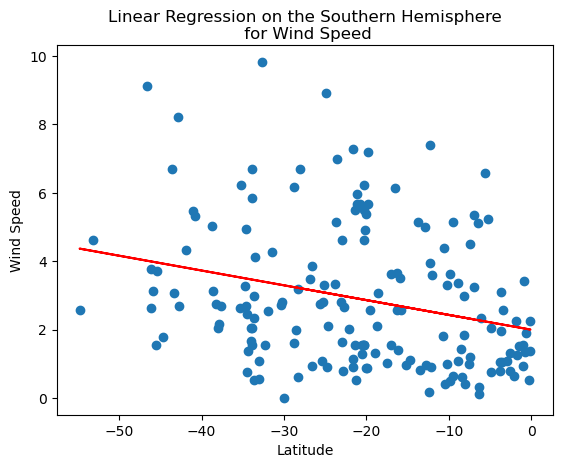

The p-value is: 0.000
The r-value is: -0.276


In [28]:
# Southern Hemisphere 
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))

**Discussion about the linear relationship:- Similarily linear regression is not best fit for wind speed data Vs Latitude in both hemisphers